# Deep Learning

In [9]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11910351434407170551
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5105057792
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12429485763216470515
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:09:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2024-01-19 15:21:19.308470: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 15:21:19.340008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 15:21:19.340208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


2024-01-19 15:21:56.110884: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 15:21:56.111158: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 15:21:56.111355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [84]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
Train, Test = keras.datasets.mnist.load_data()

In [18]:
len(Train)

2

In [19]:
len(Train[0])

60000

In [20]:
len(Train[1])

60000

In [21]:
print(len(Test[0]))
print(len(Test[1]))

10000
10000


In [22]:
Train[0][0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [23]:
len(Train[0][0][0])

28

In [24]:
Train[0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
len(Train[0][0])

28

In [26]:
len(Train[0][1])

28

In [27]:
(X_train, y_train), (X_test, y_test) = Train, Test

In [28]:
X_train[0].size

784

In [29]:
len(X_train[0][0])

28

In [30]:
28*28

784

In [31]:
y_train[1]

0

In [32]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

from class: 5


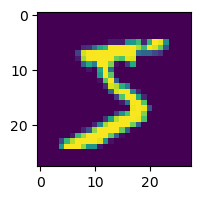

In [34]:
print(f'from class: {y_train[0]}')

plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

## Flattening Images - preprocessing

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_train_flat.shape

(60000, 784)

In [49]:
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_test_flat.shape

(10000, 784)

In [46]:
# number of input neurone in the input
len(np.unique(y_train))

10

In [47]:
# input_shape
X_train_flat[0].shape

(784,)

In [48]:
X_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [50]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

2024-01-19 15:40:26.954922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 15:40:26.955224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-19 15:40:26.955440: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [51]:
# optimisation - during backpropagation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [52]:
# Fit / Training
model.fit(X_train_flat, y_train, epochs=10)

Epoch 1/10


2024-01-19 15:45:17.544699: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f587698b9c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-19 15:45:17.544883: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050, Compute Capability 8.6
2024-01-19 15:45:17.580348: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-19 15:45:17.629629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-01-19 15:45:17.692220: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  21/1875 [..............................] - ETA: 4s - loss: 98.5490 - accuracy: 0.2202    

2024-01-19 15:45:17.759621: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 5s 2ms/step - loss: 9.5733 - accuracy: 0.8414
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0479 - accuracy: 0.8790
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6514 - accuracy: 0.8831
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4031 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3607 - accuracy: 0.8856
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3511 - accuracy: 0.8876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.1487 - accuracy: 0.8881
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3323 - accuracy: 0.8899
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3231 - accuracy: 0.8881
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2419 - accurac

![digits_nn.jpg](digits_nn.jpg)

In [53]:
# Evaluation
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.4104 - accuracy: 0.8763


[6.410350799560547, 0.8762999773025513]

In [56]:
# Check prediction or simply to predict
y_pred = model.predict(X_test_flat)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[4.9331602e-26, 0.0000000e+00, 9.6966562e-24, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 6.9842065e-26,
        1.0000000e+00, 1.5990627e-11],
       ...,
       [0.0000000e+00, 0.0000000e+00, 9.9977839e-01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.8435952e-01, ..., 1.0000000e+00,
        1.0000000e+00, 4.0466092e-10],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 8.6938413e-26]], dtype=float32)

In [59]:
y_pred[0].shape #probability of the ten classes

(10,)

In [73]:
y_pred[0]

array([4.9331602e-26, 0.0000000e+00, 9.6966562e-24, 1.0000000e+00,
       8.0039629e-38, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [74]:
y_pred[0].argmax()

3

In [75]:
index_class_max_probability = np.argmax(y_pred[0])

In [76]:
y_pred[0][index_class_max_probability]

1.0

True class: 7
Predicted class: 3


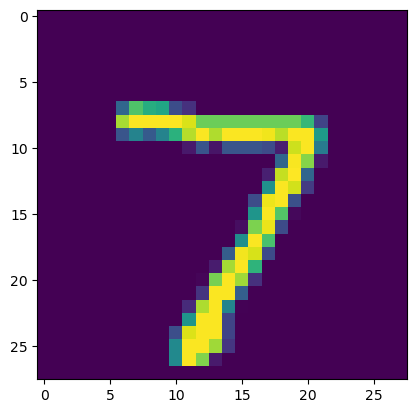

In [77]:
print(f'True class: {y_test[0]}')
print(f'Predicted class: {index_class_max_probability}')
plt.imshow(X_test[0])

In [78]:
np.argmax(y_pred[:-1])

3

# Confusion Matrix

In [80]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels

[3,
 0,
 1,
 0,
 0,
 1,
 3,
 1,
 0,
 3,
 0,
 2,
 3,
 0,
 1,
 3,
 2,
 3,
 2,
 3,
 0,
 2,
 2,
 2,
 4,
 0,
 3,
 2,
 0,
 1,
 3,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 3,
 3,
 2,
 2,
 0,
 1,
 1,
 3,
 4,
 0,
 3,
 0,
 3,
 0,
 0,
 4,
 1,
 3,
 0,
 3,
 0,
 2,
 2,
 2,
 3,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 3,
 0,
 0,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 4,
 1,
 1,
 0,
 2,
 1,
 0,
 3,
 2,
 2,
 3,
 0,
 0,
 3,
 4,
 0,
 1,
 0,
 3,
 2,
 1,
 2,
 4,
 2,
 2,
 2,
 0,
 2,
 2,
 3,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 4,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 4,
 0,
 3,
 2,
 2,
 0,
 2,
 0,
 0,
 3,
 2,
 0,
 0,
 3,
 1,
 0,
 1,
 2,
 1,
 3,
 2,
 0,
 2,
 2,
 3,
 3,
 2,
 1,
 4,
 1,
 2,
 2,
 0,
 3,
 2,
 3,
 0,
 2,
 0,
 1,


In [82]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels) # il faut mettre les labels réels
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    1,    0,    0,    0,    0,    0],
       [  11, 1123,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 374,  307,  347,    3,    1,    0,    0,    0,    0,    0],
       [ 250,  162,  380,  218,    0,    0,    0,    0,    0,    0],
       [ 236,   92,  261,  206,  187,    0,    0,    0,    0,    0],
       [ 466,   24,  212,  151,   22,   17,    0,    0,    0,    0],
       [ 350,   54,  545,    4,    2,    1,    2,    0,    0,    0],
       [ 194,  126,  240,  456,    9,    3,    0,    0,    0,    0],
       [ 361,  252,  342,   11,    4,    4,    0,    0,    0,    0],
       [ 124,  112,  310,  450,   11,    2,    0,    0,    0,    0]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Predicted Value')

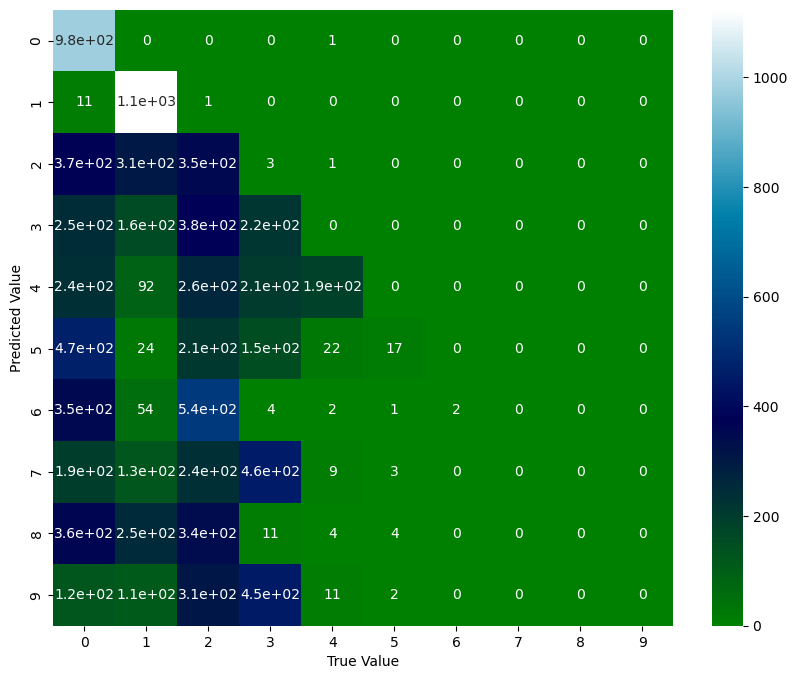

In [85]:
# import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, cmap='ocean')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

# Using Hidden Layer

In [86]:
model_plus = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),    # hidden
    keras.layers.Dense(10, activation="sigmoid")
])

model_plus.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

model_plus.fit(X_train_flat, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.6295 - accuracy: 0.8469
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3991 - accuracy: 0.9078
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.9249
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2478 - accuracy: 0.9366
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2293 - accuracy: 0.9416
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2128 - accuracy: 0.9449
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2120 - accuracy: 0.9488
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1957 - accuracy: 0.9512
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1937 - accuracy: 0.9522
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.185

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Predicted Value')

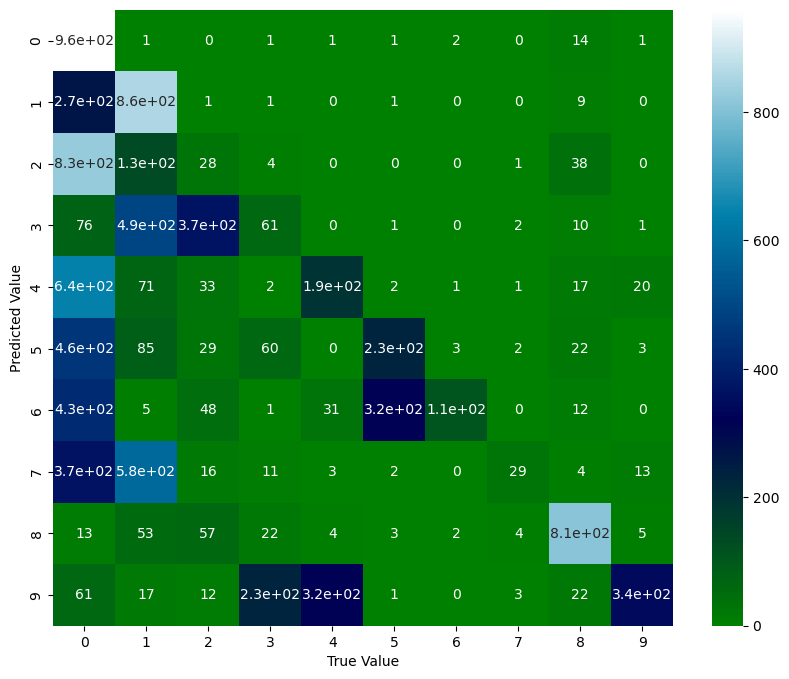

In [87]:
y_pred_plus = model_plus.predict(X_test_flat)
y_pred_labels_plus = [np.argmax(i) for i in y_pred_plus]
cm_plus = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels_plus)


# import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm_plus, annot=True, cmap='ocean')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")

Flatten done by keras

In [91]:
model_complete = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation= "relu"),
    keras.layers.Dense(200, activation= "sigmoid"),
    keras.layers.Dense(10, activation= "softmax"),

])

model_complete.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["accuracy"]
)

model_complete.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3823 - accuracy: 0.8894
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2049 - accuracy: 0.9387
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1890 - accuracy: 0.9427
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1753 - accuracy: 0.9466
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1704 - accuracy: 0.9482
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1596 - accuracy: 0.9518
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1531 - accuracy: 0.9532
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1524 - accuracy: 0.9529
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1571 - accuracy: 0.9515
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.145

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Predicted Value')

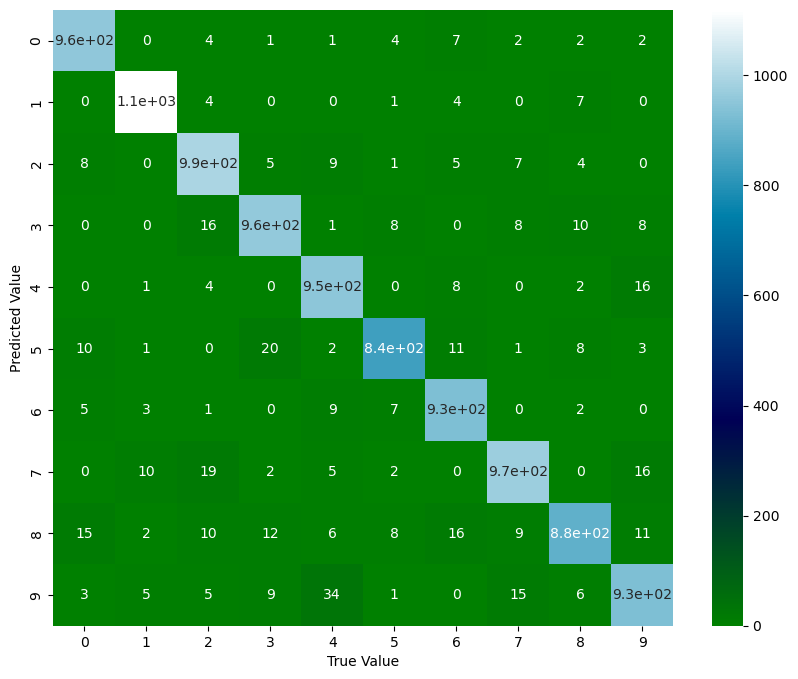

In [93]:
y_pred_comple = model_complete.predict(X_test)
y_pred_labels_comple = [np.argmax(i) for i in y_pred_comple]
cm_comple = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels_comple)


# import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm_comple, annot=True, cmap='ocean')
plt.xlabel("True Value")
plt.ylabel("Predicted Value")